<a href="https://colab.research.google.com/github/Izhan-07/TheSparksFoundation/blob/main/Task_1_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author: IZHAN AHMED H**

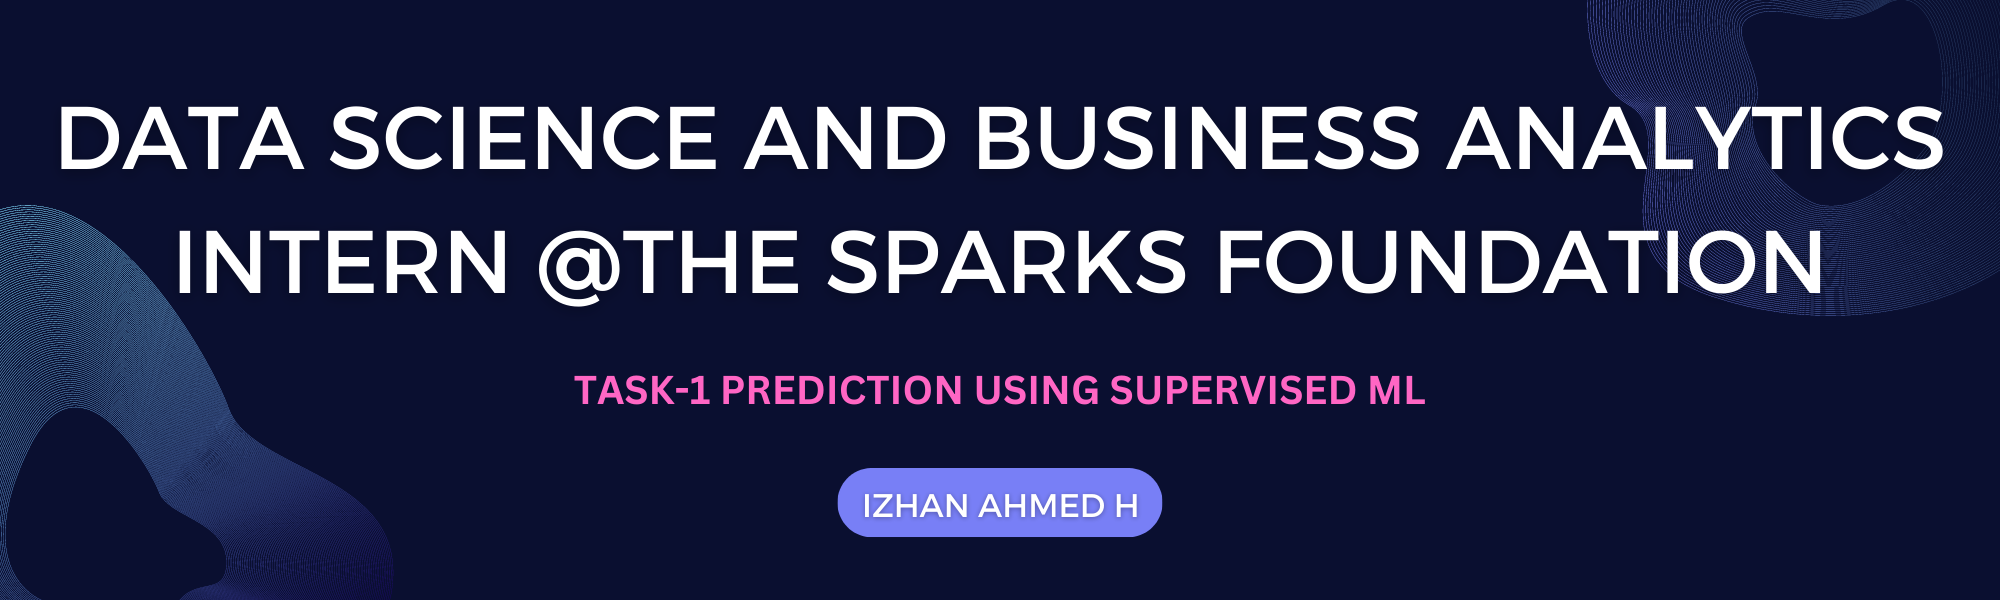

# **Task-1 Prediction using supervised ML**
To Predict the percentage of marks of the students based on the number of hours they studied

## Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [4]:
df = pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Preprocessing the data

In [6]:
# Checking the null values
df.isnull == True

False

## Visualizing the distribution of scores

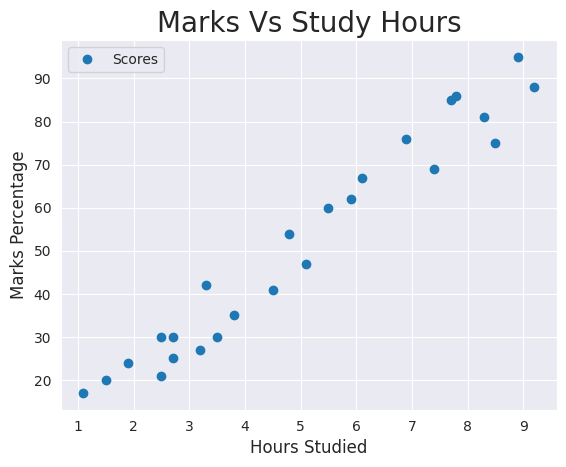

In [7]:
#Plot
sns.set_style('darkgrid')
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the above scatter plot there looks to be positive linear relation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

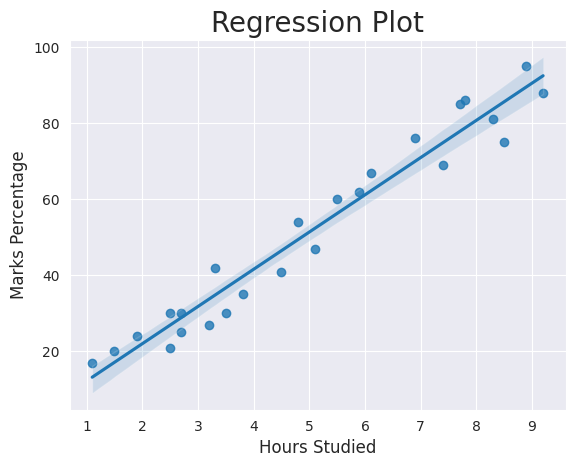

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(df.corr())

The variables are positively correlated

## Splitting the dataset into training set and test set

In [10]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

# test size 0.2 == 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## Linear Regresssion Model

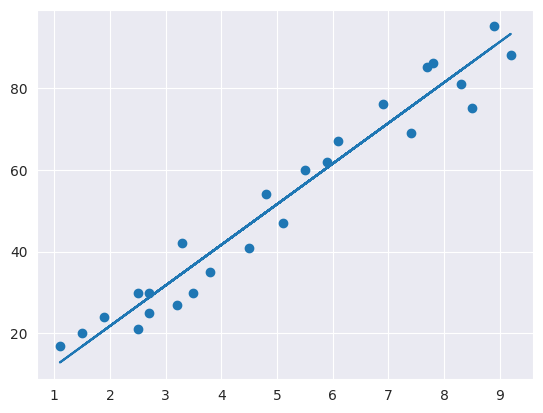

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

regression_line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, regression_line);
plt.show()

## Prediction on Unseen Test Data

In [14]:
y_pred = regressor.predict(X_test) # Predicting the scores
comparison_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
comparison_scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Visualization of Predicted Marks with Actual Marks

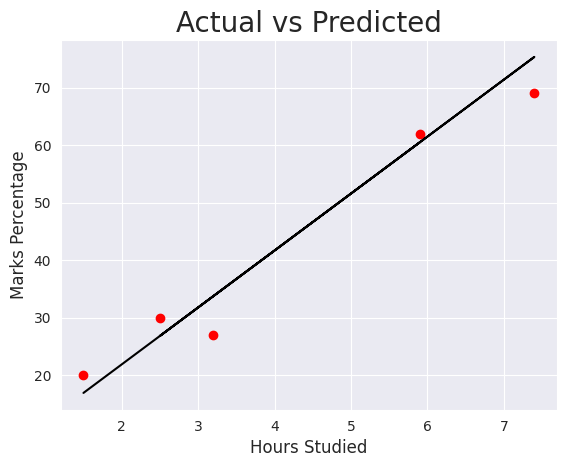

In [15]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Evaluation of regression Model

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Small value of MAE shows that the chances of predicting error are very less

# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [18]:
predicted_score_student = regressor.predict([[9.25]])
print("Score = {}".format(round(predicted_score_student[0],3)))  

Score = 93.692


According to the linear regression model if a student studies for 9.25 hours a day he/she is likely to score 93.692 marks.